# 🎬 Netflix Movie Data Analysis Project

---

## 👋 Introduction

<table>
  <tr>
    <td>
      <img src="chandu.jpg" alt="Chandu's Photo" width="140"/>
    </td>
    <td>
      <p style="font-size:16px">
        Hi, I'm <strong>Chandu Gummadelli</strong> 👋<br>
        A passionate and curious <strong>Data Science enthusiast</strong> who loves solving problems using data!<br>
        I’m currently exploring real-world projects involving Python, Pandas, and machine learning to grow as a data-driven problem solver.
      </p>
      <p>
        🔗 <a href="www.linkedin.com/in/chandu-gummadavelly-524830330" target="_blank">LinkedIn</a> &nbsp; | &nbsp;
        💻 <a href="https://github.com/Chandu-gummadavelly" target="_blank">GitHub</a>
      </p>
    </td>
  </tr>
</table>

> If you have any questions, ideas, or feedback about this notebook, feel free to reach out. I’d love to connect!

---

## 📝 Project Overview

This project involves analyzing a movie dataset named `Netflix_movie_data.csv`, which contains data such as genres, vote averages, popularity, and release dates of various movies available on streaming platforms like Netflix.

We aim to clean and transform this data into meaningful visualizations and insights.

---

## 🔧 What We Did

- **Loaded the dataset** using pandas and explored its structure.
- **Observed and fixed issues** like:
  - Null values
  - Irrelevant columns
  - Wrong data types
- **Processed the data** by:
  - Extracting year from release date
  - Categorizing vote averages (Not Good → Very Good)
  - Splitting multiple genres into separate rows for accurate analysis
- **Visualized** the data using Seaborn and Matplotlib to answer:
  - What are the most frequent genres?
  - What genres got the highest vote average?
  - Which movies are most and least popular?
  - Which year had the most releases?

---

Let’s dive in! 🚀


First, We import essential libraries like Pandas and NumPy for data handling, and Matplotlib and Seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We load the dataset into a Pandas DataFrame from a CSV file named mymoviedb.csv.

In [2]:
# loading the data into a dataframe
data_set=pd.read_csv('mymoviedb.csv',engine='python')

In [4]:
 print(data_set.head(10))

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   
5   2022-01-07             The Commando   
6   2022-01-12                   Scream   
7   2022-02-10                     Kimi   
8   2022-02-17     Fistful of Vengeance   
9   2021-11-03                 Eternals   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   
5  An elite DEA agent returns home after a failed...

In [5]:
 print(data_set.columns)

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')


In [6]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB
None


In [7]:
print(data_set.duplicated().sum())

0


In [8]:
print(data_set.describe())

        Popularity
count  9827.000000
mean     40.320570
std     108.874308
min       7.100000
25%      16.127500
50%      21.191000
75%      35.174500
max    5083.954000


Initial Observations

We observed the dataset has null values, inappropriate data types, and unnecessary columns for our analysis.

We planned to clean the data by removing nulls, fixing data types, and removing irrelevant columns.

In [9]:
data_set.dropna(inplace=True)

In [10]:
data_set.drop(["Overview","Original_Language","Poster_Url"],axis=1,inplace=True)

In [12]:
 print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   object 
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), object(5)
memory usage: 537.4+ KB
None


We dropped all rows containing null values and removed the columns that are not useful for our analysis: Overview, Original_Language, and Poster_Url.

In [18]:
# datatypes issue

data_set['Vote_Count'] =data_set['Vote_Count'].astype(int)
print(data_set['Vote_Count'].dtype)

int64


In [17]:
data_set['Vote_Average'] = data_set['Vote_Average'].astype(float)
print(data_set['Vote_Average'].dtype)

float64


In [15]:
data_set['Release_Date'] = pd.to_datetime(data_set['Release_Date'])
print(data_set['Release_Date'].dtype)

datetime64[ns]


We corrected the data types:

Vote_Count as integer

Vote_Average as float

Release_Date as datetime

In [19]:
data_set['Release_Date'] = data_set['Release_Date'].dt.year
print(data_set['Release_Date'].dtype)

int32


Since we only need the year of release for analysis, we extracted the year from the full date.

In [20]:
# next we categorize the vote_average column into 4 categories
def categorize_col(df,col,labels):
    boundaries=[df[col].describe()['min'],
                df[col].describe()['25%'],
                df[col].describe()['50%'],
                df[col].describe()['75%'],
                df[col].describe()['max']]
    df[col] = pd.cut(df[col],boundaries,labels=labels,duplicates='drop')
    return df

In [21]:
labels=['Not_good','Average','Good','Very_Good']
categorize_col(data_set,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Very_Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Very_Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Very_Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Good,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,Very_Good,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,Not_good,Horror
9834,2016,The Offering,13.355,94,Not_good,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,Good,"Music, Drama, History"


In [22]:
print(data_set['Vote_Average'].unique())

['Very_Good', 'Average', 'Good', 'Not_good', NaN]
Categories (4, object): ['Not_good' < 'Average' < 'Good' < 'Very_Good']


In [23]:
print(data_set.head())

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
1          2022               The Batman    3827.658        1151    Very_Good   
2          2022                  No Exit    2618.087         122      Average   
3          2021                  Encanto    2402.201        5076    Very_Good   
4          2021           The King's Man    1895.511        1793         Good   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War  


In [24]:
print(data_set['Vote_Average'].value_counts())

Vote_Average
Not_good     2467
Very_Good    2450
Good         2411
Average      2398
Name: count, dtype: int64


We categorized the Vote_Average column into four buckets: Not_good, Average, Good, Very_Good, based on quantile values. This helps us analyze the distribution of quality ratings better.

In [25]:
data_set['Genre'] =data_set['Genre'].str.split(', ')
data_set=data_set.explode('Genre').reset_index(drop=True)

In [26]:
print(data_set.head())

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
1          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
2          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
3          2022               The Batman    3827.658        1151    Very_Good   
4          2022               The Batman    3827.658        1151    Very_Good   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery  


In [27]:
print(data_set.info)

<bound method DataFrame.info of        Release_Date                                 Title  Popularity  \
0              2021               Spider-Man: No Way Home    5083.954   
1              2021               Spider-Man: No Way Home    5083.954   
2              2021               Spider-Man: No Way Home    5083.954   
3              2022                            The Batman    3827.658   
4              2022                            The Batman    3827.658   
...             ...                                   ...         ...   
25787          2021  The United States vs. Billie Holiday      13.354   
25788          2021  The United States vs. Billie Holiday      13.354   
25789          1984                               Threads      13.354   
25790          1984                               Threads      13.354   
25791          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
0            8940    Very_Good           

In [28]:
print(data_set.nunique)

<bound method DataFrame.nunique of        Release_Date                                 Title  Popularity  \
0              2021               Spider-Man: No Way Home    5083.954   
1              2021               Spider-Man: No Way Home    5083.954   
2              2021               Spider-Man: No Way Home    5083.954   
3              2022                            The Batman    3827.658   
4              2022                            The Batman    3827.658   
...             ...                                   ...         ...   
25787          2021  The United States vs. Billie Holiday      13.354   
25788          2021  The United States vs. Billie Holiday      13.354   
25789          1984                               Threads      13.354   
25790          1984                               Threads      13.354   
25791          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
0            8940    Very_Good        

We split multiple genres in a single row into separate rows using explode. This enables one genre per row, which is important for accurate analysis.

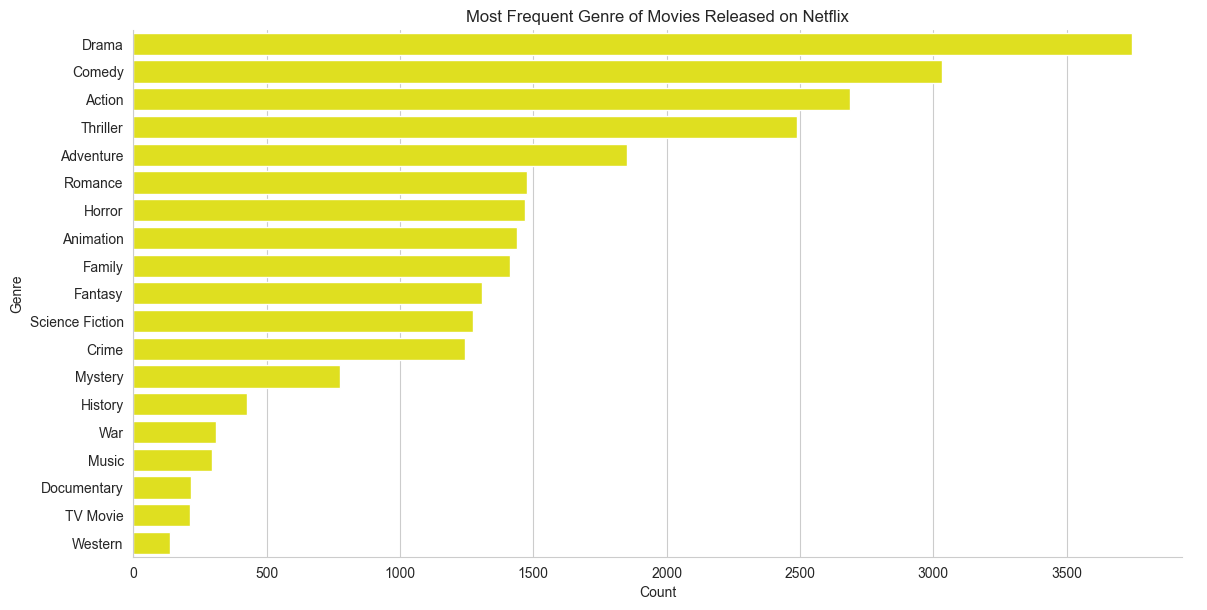

In [29]:

# now solving quesions by visualising data

# 1. What is the most frequent genre of movies released on netflix?

data_set['Genre'].describe()

sns.set_style("whitegrid")
sns.catplot(y='Genre', kind='count',
             data=data_set, height=6, aspect=2,color='yellow',order=data_set['Genre'].value_counts().index)
plt.title('Most Frequent Genre of Movies Released on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

This plot shows the most common genres among movies in our dataset.

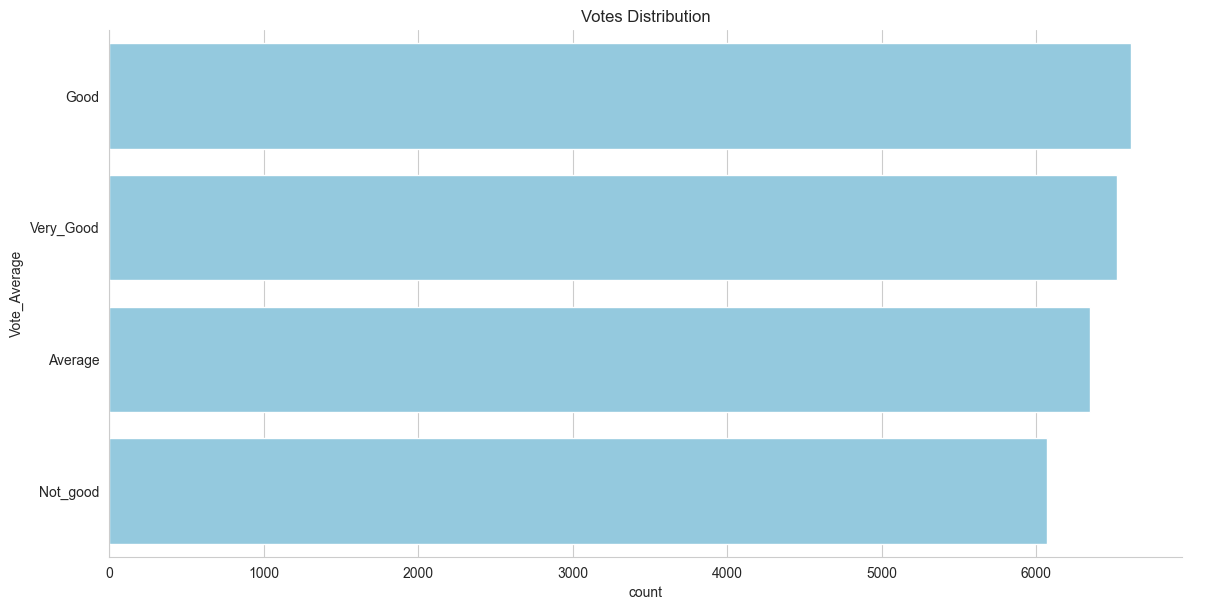

In [36]:
# 2. What genres has highest Votes IN VOTE AVG COLUMN ?
sns.catplot(y='Vote_Average', kind='count',
             data=data_set, height=6, aspect=2, color='skyblue', order=data_set['Vote_Average'].value_counts().index)
plt.title('Votes Distribution')

plt.show()


This chart visualizes how movies are distributed based on their vote average category: from Not Good to Very Good.

In [32]:
# 3. What movie got the highest Popularity?What is it's genre?
print(data_set[data_set['Popularity'] == data_set['Popularity'].max()])

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
1          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   
2          2021  Spider-Man: No Way Home    5083.954        8940    Very_Good   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  


We find the movie that has highest popularity in the dataset.

In [33]:
# 4. What movie got the Lowest Popularity?What is it's genre?
print(data_set[data_set['Popularity'] == data_set['Popularity'].min()])

       Release_Date                                 Title  Popularity  \
25786          2021  The United States vs. Billie Holiday      13.354   
25787          2021  The United States vs. Billie Holiday      13.354   
25788          2021  The United States vs. Billie Holiday      13.354   
25789          1984                               Threads      13.354   
25790          1984                               Threads      13.354   
25791          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25786         152         Good            Music  
25787         152         Good            Drama  
25788         152         Good          History  
25789         186    Very_Good              War  
25790         186    Very_Good            Drama  
25791         186    Very_Good  Science Fiction  


We find the movie that has lowest popularity in the dataset.

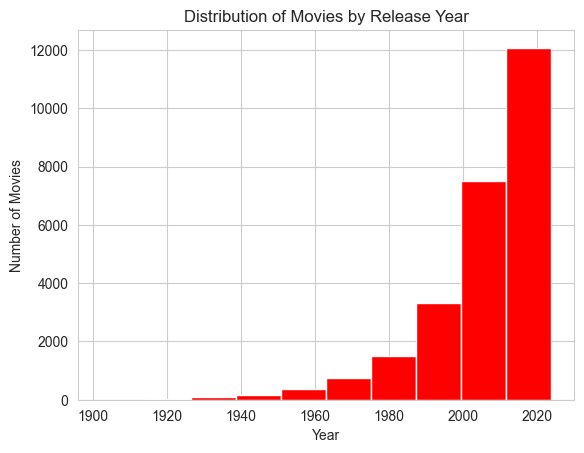

In [35]:
# 5. Which year has the most filmmed movies?
data_set['Release_Date'].hist(color='red')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

This histogram helps us identify the year(s) when maximum movies were released.

In [ ]:
---

## ✅ Conclusion

Through this project, I was able to practice real-world data cleaning, transformation, categorization, and visualization using Python. I learned how to:

- Handle missing values and fix data types
- Perform feature engineering like genre splitting and vote categorization
- Use Seaborn and Matplotlib to gain meaningful insights from raw data

This project not only sharpened my technical skills but also improved my ability to **draw conclusions from visual data** and tell a compelling story.

---

## 💬 Final Thoughts

As a student passionate about **data science**, this project was a valuable step in my learning journey. I enjoyed every part of it 
from tackling raw data issues to finally answering real questions through visualization.

If you're someone exploring data or have any feedback/suggestions about this notebook, please feel free to reach out!

---

## 📬 Let’s Connect

- 🔗 [LinkedIn](https://www.linkedin.com/in/chandu-gummadavelly-524830330)
- 💻 [GitHub](https://github.com/Chandu-gummadavelly)
*

Thanks for reading! 😊

